In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

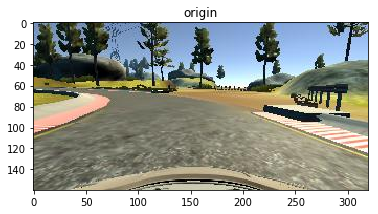

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread(data['center'][2].strip())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('origin')

In [3]:
from keras.models import load_model

model_pilot = load_model('train-pilot/model/model.h5')
model_ours = load_model('train-ours/model/model.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
import matplotlib.cm as cm
import numpy as np

## train-pilotNet

In [5]:
layer_idx = utils.find_layer_idx(model_pilot, 'conv2d_5')
grads = visualize_saliency(model_pilot, layer_idx=layer_idx, filter_indices=None,
                           seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 319.5, 159.5, -0.5)

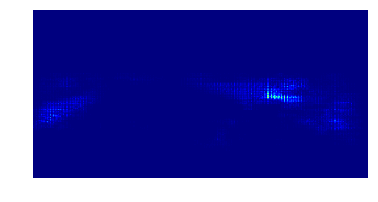

In [6]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 319.5, 159.5, -0.5)

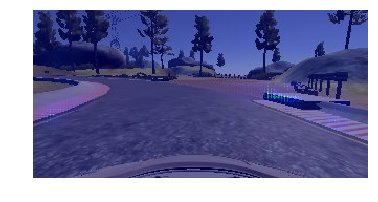

In [7]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')

## train-ours

In [8]:
layer_idx = utils.find_layer_idx(model_ours, 'conv2d_13')
grads = visualize_saliency(model_ours, layer_idx=layer_idx, filter_indices=None,
                           seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 319.5, 159.5, -0.5)

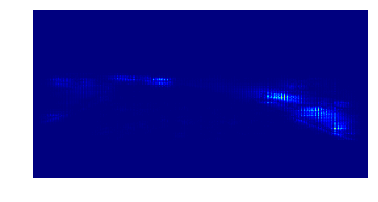

In [9]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 319.5, 159.5, -0.5)

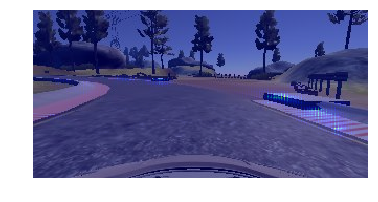

In [10]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')